# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')

In [4]:
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [8]:
intervalos = [-1, 3, 5, 7, 10]
rotulos = ['Asfixia Severa', 'Asfixia Moderada', 'Asfixia Leve', 'Normal']

sinasc['APGAR_Categoria'] = pd.cut(sinasc['APGAR5'], bins=intervalos, labels=rotulos, right=True)
frequencia_apgar = sinasc['APGAR_Categoria'].value_counts()
print("Frequências da categorização do Apgar:")
print(frequencia_apgar)


Frequências da categorização do Apgar:
APGAR_Categoria
Normal              26463
Asfixia Leve          320
Asfixia Severa         74
Asfixia Moderada       68
Name: count, dtype: int64


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

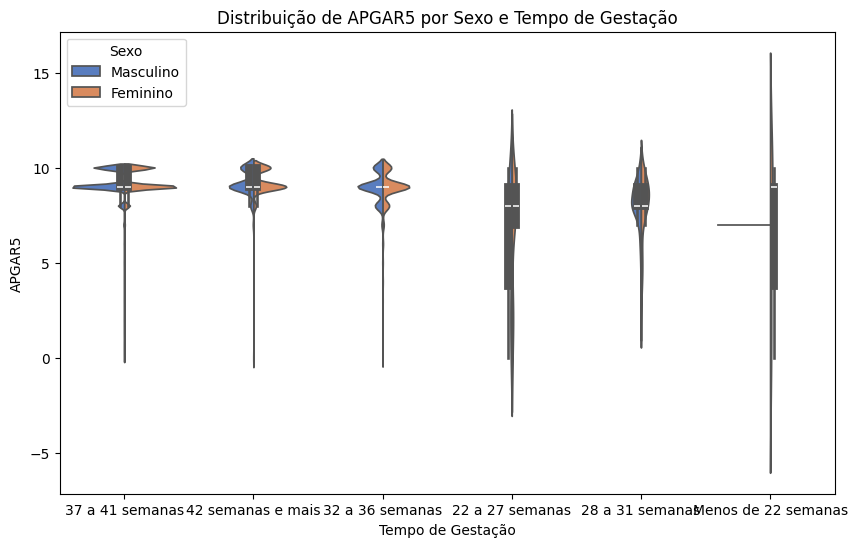

In [10]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=sinasc, split=True, palette='muted')

plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')

plt.legend(title='Sexo')

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [11]:
tabela_cruzada = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])

In [12]:
tabela_cruzada.loc['Total'] = tabela_cruzada.sum()

In [13]:
tabela_cruzada['Total'] = tabela_cruzada.sum(axis=1)

In [14]:
print(tabela_cruzada)

APGAR5               0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0    9.0  \
GESTACAO                                                                   
22 a 27 semanas        7    0    8    6    1    0    2   10    24     19   
28 a 31 semanas        0    0    2    1    5    7    7   11    61     55   
32 a 36 semanas        2    2    2    2    8   11   17   56   362   1307   
37 a 41 semanas        5   20    3    5    7   21   45  151  1417  13565   
42 semanas e mais      1    0    0    0    0    1    1    5    44    423   
Menos de 22 semanas    1    0    1    0    0    0    0    1     0      3   
Total                 16   22   16   14   21   40   72  234  1908  15372   

APGAR5               10.0  Total  
GESTACAO                          
22 a 27 semanas         8     85  
28 a 31 semanas        13    162  
32 a 36 semanas       465   2234  
37 a 41 semanas      7284  22523  
42 semanas e mais     223    698  
Menos de 22 semanas     1      7  
Total                7994  25709  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [15]:
percentuais_linha = tabela_cruzada.div(tabela_cruzada['Total'], axis=0) * 100

In [16]:
print(percentuais_linha)

APGAR5                     0.0       1.0        2.0       3.0       4.0  \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   
Total                 0.062235  0.085573   0.062235  0.054456  0.081683   

APGAR5                    5.0       6.0        7.0        8.0        9.0  \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas     

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [22]:
prematuro = percentuais_linha.iloc[:37].sum()

In [23]:
termo = percentuais_linha.iloc[37:].sum()

In [24]:
dados = pd.DataFrame({'Prematuro': prematuro, 'Termo': termo})

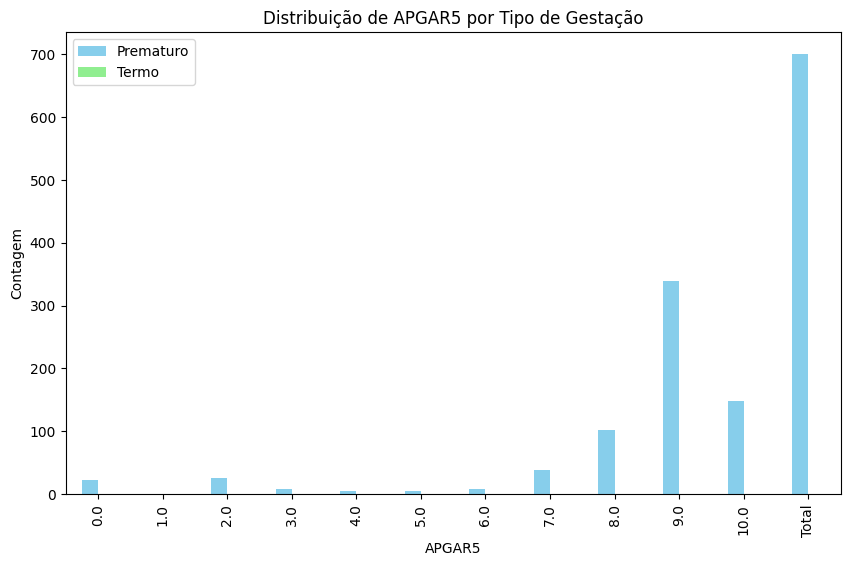

In [25]:
dados.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])

plt.title('Distribuição de APGAR5 por Tipo de Gestação')
plt.xlabel('APGAR5')
plt.ylabel('Contagem')

plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

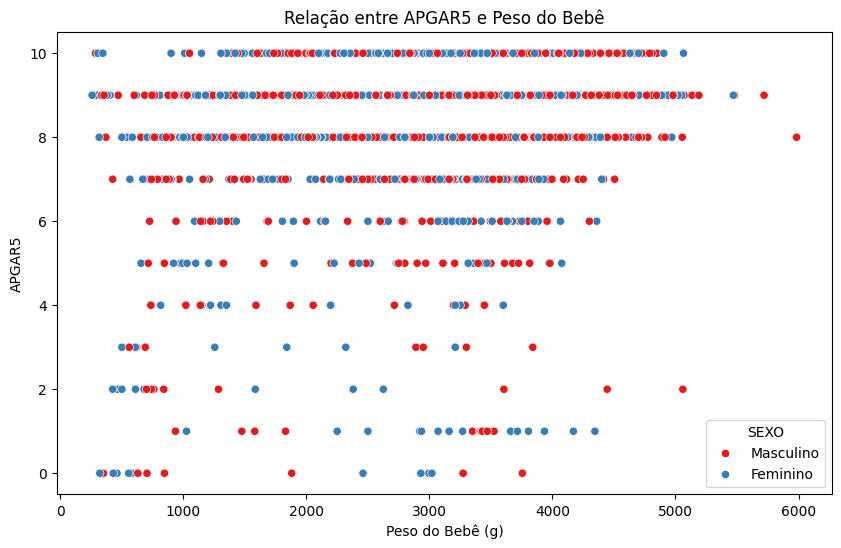

In [27]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='PESO', y='APGAR5', data=sinasc, hue='SEXO', palette='Set1')

plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('Peso do Bebê (g)')
plt.ylabel('APGAR5')

plt.show()